# RamPrice

In [1]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Чтобы ошибки не мозолили глаза
import warnings
warnings.filterwarnings('ignore')

In [3]:
def pandas_info(data):
    '''
    список всех данных в пандасе
    '''
    print(*[data.info(), data.describe(), data.index], sep="\n-----------------------\n")

In [4]:
def create_posix(data, freq=None):
    data_freq = pd.date_range(start=data.index.min(), end=data.index.max(), freq=freq)
    data_posix = np.array(data_freq.astype(int) // 10 ** 9).reshape(-1,1)
    return data_posix

# Функция разделения на обуч. и тестовые выборки
def train_test_split_dt(data_posix, data_pd, year, freq=None):

    X_all = data_posix.loc[data_pd.index]
    X_all = create_posix(X_all, freq)

    y_all = data_pd.loc[data_pd.index]
    y_all = np.array(y_all).reshape(-1, data_pd.shape[1])
    y_all = y_all[:-1]

    X_train = data_posix.loc[data_pd.index < year]
    X_train = create_posix(X_train, freq)

    y_train = data_pd.loc[data_pd.index < year]
    y_train = np.array(y_train).reshape(-1, data_pd.shape[1])
    y_train = y_train[:-1]

    X_test = data_posix.loc[data_pd.index > year]
    X_test = create_posix(X_test, freq)
#     X_test = np.array(X_test.index).reshape(-1,1)

    y_test = data_pd.loc[data_pd.index > year]
    y_test = np.array(y_test).reshape(-1, data_pd.shape[1])
    y_test = y_test[:-1]
    return X_train, y_train, X_test, y_test, X_all, y_all

In [5]:
data = pd.read_csv('BigRamPrice2.csv', sep=';')
#, 'tupe_ram', 'max_stick', 'maks_desktop_gb']
data_1 = data.loc[:,'Date':'processnodes(nm)'].copy()
data_2 = data.loc[:,'tupe_ram':'maks_desktop_gb'].copy()

data = pd.concat([data_1, data_2], axis=1)

In [6]:
pandas_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              670 non-null    object 
 1   price_ram         670 non-null    float64
 2   Price_gold        670 non-null    float64
 3   processnodes(nm)  670 non-null    int64  
 4   tupe_ram          214 non-null    float64
 5   max_stick         214 non-null    float64
 6   maks_desktop_gb   214 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 36.8+ KB
None
-----------------------
          price_ram   Price_gold  processnodes(nm)    tupe_ram   max_stick  \
count  6.700000e+02   670.000000        670.000000  214.000000  214.000000   
mean   5.528262e+05   407.063288       3073.673134    2.317757    7.158879   
std    1.209703e+06   400.669376       3872.270711    0.993860    8.983187   
min    3.700000e-03    34.946000         14.000000    1.000000    1.0

In [7]:
data

,Date,price_ram,Price_gold,processnodes(nm),tupe_ram,max_stick,maks_desktop_gb
0,1960-01,5.242880e+06,35.090,10000,NaN,NaN,NaN
1,1960-02,5.199539e+06,35.090,10000,NaN,NaN,NaN
2,1960-03,5.156198e+06,35.090,10000,NaN,NaN,NaN
3,1960-04,5.112857e+06,35.110,10000,NaN,NaN,NaN
4,1960-05,5.069515e+06,35.100,10000,NaN,NaN,NaN
...,...,...,...,...,...,...,...
665,2015-06,5.050000e-03,1182.248,14,4.0,32.0,128.0
666,2015-07,4.500000e-03,1131.580,14,4.0,32.0,128.0
667,2015-08,4.400000e-03,1117.525,14,4.0,32.0,128.0
668,2015-09,4.300000e-03,1124.905,14,4.0,32.0,128.0


In [8]:
data = data.dropna()

In [9]:
data

,Date,price_ram,Price_gold,processnodes(nm),tupe_ram,max_stick,maks_desktop_gb
456,1998-01,0.91000,289.264,250,1.0,1.0,4.0
457,1998-02,0.94000,297.743,250,1.0,1.0,4.0
458,1998-03,0.97000,295.870,250,1.0,1.0,4.0
459,1998-04,1.22000,308.558,250,1.0,1.0,4.0
460,1998-05,1.19000,298.971,250,1.0,1.0,4.0
...,...,...,...,...,...,...,...
665,2015-06,0.00505,1182.248,14,4.0,32.0,128.0
666,2015-07,0.00450,1131.580,14,4.0,32.0,128.0
667,2015-08,0.00440,1117.525,14,4.0,32.0,128.0
668,2015-09,0.00430,1124.905,14,4.0,32.0,128.0


# Кореляция признаков

 матрицу с коэффициентами корреляции признаков

                  price_ram  Price_gold  processnodes(nm)  tupe_ram  \
price_ram          1.000000   -0.575053          0.860848 -0.696808   
Price_gold        -0.575053    1.000000         -0.777211  0.824453   
processnodes(nm)   0.860848   -0.777211          1.000000 -0.888802   
tupe_ram          -0.696808    0.824453         -0.888802  1.000000   
max_stick         -0.393579    0.577608         -0.578750  0.806236   
maks_desktop_gb   -0.393579    0.577608         -0.578750  0.806236   

                  max_stick  maks_desktop_gb  
price_ram         -0.393579        -0.393579  
Price_gold         0.577608         0.577608  
processnodes(nm)  -0.578750        -0.578750  
tupe_ram           0.806236         0.806236  
max_stick          1.000000         1.000000  
maks_desktop_gb    1.000000         1.000000  


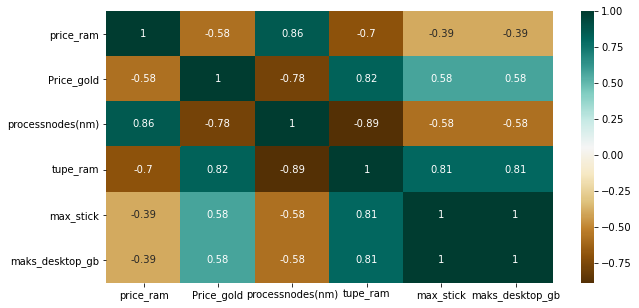

In [10]:
import seaborn as sns

plt.figure(figsize=(10,5))
CorrKoef = data.corr()
sns.heatmap(CorrKoef,cmap="BrBG",annot=True)
print(CorrKoef)


Удаляем столбцы, так как такая корреляция нам не подходит

In [11]:
data = data.drop('max_stick', axis = 1)
data = data.drop('maks_desktop_gb', axis = 1)

In [12]:
data

,Date,price_ram,Price_gold,processnodes(nm),tupe_ram
456,1998-01,0.91000,289.264,250,1.0
457,1998-02,0.94000,297.743,250,1.0
458,1998-03,0.97000,295.870,250,1.0
459,1998-04,1.22000,308.558,250,1.0
460,1998-05,1.19000,298.971,250,1.0
...,...,...,...,...,...
665,2015-06,0.00505,1182.248,14,4.0
666,2015-07,0.00450,1131.580,14,4.0
667,2015-08,0.00440,1117.525,14,4.0
668,2015-09,0.00430,1124.905,14,4.0


Преобразовываем столбец tupe_ram в dummy

In [13]:
dummy = pd.get_dummies(data['tupe_ram'])

In [14]:
dummy

,1.0,2.0,3.0,4.0
456,1,0,0,0
457,1,0,0,0
458,1,0,0,0
459,1,0,0,0
460,1,0,0,0
...,...,...,...,...
665,0,0,0,1
666,0,0,0,1
667,0,0,0,1
668,0,0,0,1


Удаляем столбец tupe_ram из исходного набора данных

In [15]:
data = data.drop('tupe_ram', axis = 1)

In [16]:
data = np.asarray(data)

In [17]:
dummy = np.asarray(dummy)

Добавляем к исходному датасету dummy

In [18]:
data = np.hstack((data, dummy))

In [19]:
datad1 = data

In [20]:
data = pd.DataFrame(datad1, columns=['Date', 'price_ram', 'Price_gold', 'processnodes(nm)', 'vA','vB','vC','vD'])

In [21]:
data

,Date,price_ram,Price_gold,processnodes(nm),vA,vB,vC,vD
0,1998-01,0.91,289.264,250,1,0,0,0
1,1998-02,0.94,297.743,250,1,0,0,0
2,1998-03,0.97,295.87,250,1,0,0,0
3,1998-04,1.22,308.558,250,1,0,0,0
4,1998-05,1.19,298.971,250,1,0,0,0
...,...,...,...,...,...,...,...,...
209,2015-06,0.00505,1182.248,14,0,0,0,1
210,2015-07,0.0045,1131.58,14,0,0,0,1
211,2015-08,0.0044,1117.525,14,0,0,0,1
212,2015-09,0.0043,1124.905,14,0,0,0,1


Следующим шагом мы найдем поля которые коррелируют между собой (у которых коэффициент корреляции больше 90%), используя нашу матрицу:


In [22]:
CorField = []
for i in CorrKoef:
    for j in CorrKoef.index[CorrKoef[i] > 0.8]:
        if i > j and j not in CorField and i not in CorField:
            CorField.append(j)
            print ("%s-->%s: r^2=%f" % (i,j, CorrKoef[i][CorrKoef.index==j].values[0]))

processnodes(nm)-->price_ram: r^2=0.860848
tupe_ram-->Price_gold: r^2=0.824453
tupe_ram-->max_stick: r^2=0.806236
tupe_ram-->maks_desktop_gb: r^2=0.806236


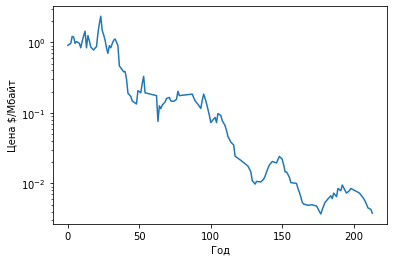

In [23]:
plt.semilogy(data.price_ram)
plt.xlabel("Год")
plt.ylabel("Цена $/Мбайт");

# Предобработка (Preprocessing)
## Создание даты
Здесь мы будем преобразовывать даты в нормальный формат, и логарифмировать цены

In [24]:
df = data
date_indexs = np.log(data['price_ram'].astype('float') + 1)
df['price_ram'] = pd.DataFrame(date_indexs)
df

,Date,price_ram,Price_gold,processnodes(nm),vA,vB,vC,vD
0,1998-01,0.647103,289.264,250,1,0,0,0
1,1998-02,0.662688,297.743,250,1,0,0,0
2,1998-03,0.678034,295.87,250,1,0,0,0
3,1998-04,0.797507,308.558,250,1,0,0,0
4,1998-05,0.783902,298.971,250,1,0,0,0
...,...,...,...,...,...,...,...,...
209,2015-06,0.005037,1182.248,14,0,0,0,1
210,2015-07,0.004490,1131.58,14,0,0,0,1
211,2015-08,0.004390,1117.525,14,0,0,0,1
212,2015-09,0.004291,1124.905,14,0,0,0,1


Выведем пару графиков наших столбцов

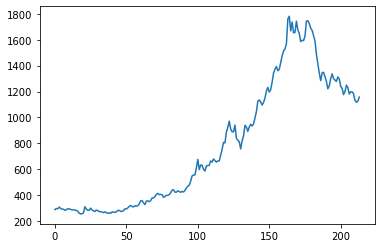

In [25]:
plt.plot(df['Price_gold'])

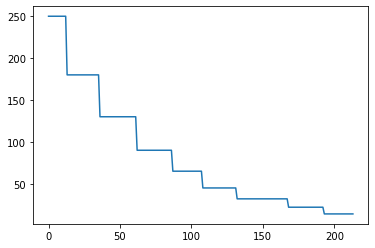

In [26]:
plt.plot(df['processnodes(nm)'])

Делаем столбец с датами индексным

In [27]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(['Date'])
df_1 = df

In [28]:
df

,price_ram,Price_gold,processnodes(nm),vA,vB,vC,vD
Date,,,,,,,
1998-01-01,0.647103,289.264,250,1,0,0,0
1998-02-01,0.662688,297.743,250,1,0,0,0
1998-03-01,0.678034,295.87,250,1,0,0,0
1998-04-01,0.797507,308.558,250,1,0,0,0
1998-05-01,0.783902,298.971,250,1,0,0,0
...,...,...,...,...,...,...,...
2015-06-01,0.005037,1182.248,14,0,0,0,1
2015-07-01,0.004490,1131.58,14,0,0,0,1
2015-08-01,0.004390,1117.525,14,0,0,0,1


Проверка на стационарность

In [29]:
from statsmodels.tsa.stattools import adfuller
# Prepro_data_np = np.array(Prepro_data_pd.values)

res = adfuller(df.price_ram, autolag='BIC') 
if res[1] > 0.05:          # 0.05 - гипотеза 5%
        print('Временной ряд НЕ стационарный')  # сравнение с p-value
else:
        print('Временной ряд стационарный')

Временной ряд НЕ стационарный


## Создаём первую обучающую выборку

Сделаем тетсовые и обучающие выборки:<br>
    Обуч.: с 1990-2013гг.<br>
    Тест.: с 2014гг.

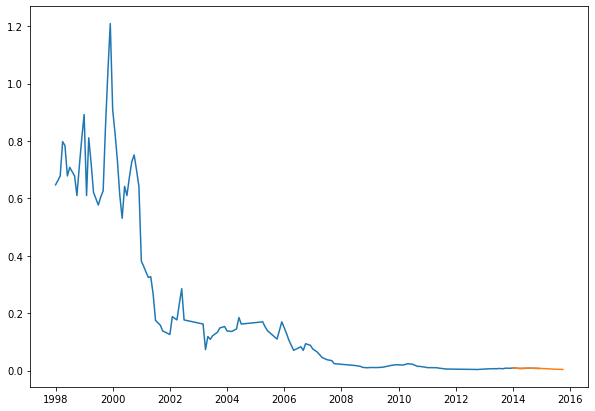

In [30]:
data_2 = df.loc[:'2014']
data_3 = df.loc['2014':]

fig, ax2 = plt.subplots(1,figsize=(10,7))
ax2.plot(data_2.price_ram)
ax2.plot(data_3.price_ram);

In [31]:
data_3.price_ram

Date
2014-01-01    0.009455
2014-02-01    0.008662
2014-03-01    0.007869
2014-04-01    0.007273
2014-05-01    0.007571
2014-06-01    0.007869
2014-07-01    0.008464
2014-08-01    0.008266
2014-09-01    0.008067
2014-10-01    0.007869
2014-11-01    0.007671
2014-12-01    0.007472
2015-01-01    0.007273
2015-02-01    0.006876
2015-03-01    0.006479
2015-04-01    0.006081
2015-05-01    0.005584
2015-06-01    0.005037
2015-07-01    0.004490
2015-08-01    0.004390
2015-09-01    0.004291
2015-10-01    0.003793
Name: price_ram, dtype: float64

## Поквартальные точки

In [32]:
xticks = pd.date_range(start=df.index.min(), end=df.index.max(), freq='Q')
xticks

DatetimeIndex(['1998-03-31', '1998-06-30', '1998-09-30', '1998-12-31',
               '1999-03-31', '1999-06-30', '1999-09-30', '1999-12-31',
               '2000-03-31', '2000-06-30', '2000-09-30', '2000-12-31',
               '2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31',
               '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31',
               '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31',
               '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
               '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
      

Перевод в дат в posix формат

UNIX time - числовое представление* дат в виде чисел в секундах (каждую дату мы переводим в секунды) <br>
*Сделано для улучшения работы машины

In [33]:
xticks1 = xticks.astype('int64') // 10 ** 9
xticks1 = np.array(xticks1)
xticks1

array([ 891302400,  899164800,  907113600,  915062400,  922838400,
        930700800,  938649600,  946598400,  954460800,  962323200,
        970272000,  978220800,  985996800,  993859200, 1001808000,
       1009756800, 1017532800, 1025395200, 1033344000, 1041292800,
       1049068800, 1056931200, 1064880000, 1072828800, 1080691200,
       1088553600, 1096502400, 1104451200, 1112227200, 1120089600,
       1128038400, 1135987200, 1143763200, 1151625600, 1159574400,
       1167523200, 1175299200, 1183161600, 1191110400, 1199059200,
       1206921600, 1214784000, 1222732800, 1230681600, 1238457600,
       1246320000, 1254268800, 1262217600, 1269993600, 1277856000,
       1285804800, 1293753600, 1301529600, 1309392000, 1317340800,
       1325289600, 1333152000, 1341014400, 1348963200, 1356912000,
       1364688000, 1372550400, 1380499200, 1388448000, 1396224000,
       1404086400, 1412035200, 1419984000, 1427760000, 1435622400,
       1443571200], dtype=int64)

Перевод posix данных в Pandas-формат

In [34]:
df_1 = df.copy()
df_1.index = pd.to_datetime(df.index).astype("int64") // 10**9
df_1.index

Int64Index([ 883612800,  886291200,  888710400,  891388800,  893980800,
             896659200,  899251200,  901929600,  904608000,  907200000,
            ...
            1420070400, 1422748800, 1425168000, 1427846400, 1430438400,
            1433116800, 1435708800, 1438387200, 1441065600, 1443657600],
           dtype='int64', name='Date', length=214)

In [35]:
df_1

,price_ram,Price_gold,processnodes(nm),vA,vB,vC,vD
Date,,,,,,,
883612800,0.647103,289.264,250,1,0,0,0
886291200,0.662688,297.743,250,1,0,0,0
888710400,0.678034,295.87,250,1,0,0,0
891388800,0.797507,308.558,250,1,0,0,0
893980800,0.783902,298.971,250,1,0,0,0
...,...,...,...,...,...,...,...
1433116800,0.005037,1182.248,14,0,0,0,1
1435708800,0.004490,1131.58,14,0,0,0,1
1438387200,0.004390,1117.525,14,0,0,0,1


## Создаём массив X с посикс данными

In [36]:
X = np.array(df_1.index)
X = X.reshape(-1,1)
X[:5]

array([[883612800],
       [886291200],
       [888710400],
       [891388800],
       [893980800]], dtype=int64)

# Создание даты

Проверим ряд на стационарность

In [37]:
from statsmodels.tsa.stattools import adfuller
# Prepro_data_np = np.array(Prepro_data_pd.values)

res = adfuller(df_1.price_ram, autolag='t-stat') 
if res[1] > 0.05:          # 0.05 - гипотеза 5%
        print('Временной ряд НЕ стационарный')  # сравнение с p-value
else:
        print('Временной ряд стационарный')

Временной ряд НЕ стационарный


## Разделение данных на тест и обуч выборки в формате Pandas


In [38]:
from pandas import read_csv, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [39]:
y_stolb = df_1[['price_ram']]
X_stolb = df_1.drop(['price_ram'], axis=1)


print(y_stolb)
print(X_stolb)

            price_ram
Date                 
883612800    0.647103
886291200    0.662688
888710400    0.678034
891388800    0.797507
893980800    0.783902
...               ...
1433116800   0.005037
1435708800   0.004490
1438387200   0.004390
1441065600   0.004291
1443657600   0.003793

[214 rows x 1 columns]
           Price_gold processnodes(nm) vA vB vC vD
Date                                              
883612800     289.264              250  1  0  0  0
886291200     297.743              250  1  0  0  0
888710400      295.87              250  1  0  0  0
891388800     308.558              250  1  0  0  0
893980800     298.971              250  1  0  0  0
...               ...              ... .. .. .. ..
1433116800   1182.248               14  0  0  0  1
1435708800    1131.58               14  0  0  0  1
1438387200   1117.525               14  0  0  0  1
1441065600   1124.905               14  0  0  0  1
1443657600   1157.123               14  0  0  0  1

[214 rows x 6 columns]


Возвращаем столбец с датой в привычный нам формат и делаем его индексным

In [40]:
y_stolb_ind = pd.to_datetime(y_stolb.index, unit='s')

y_stolb['Data'] = y_stolb_ind

y_stolb = y_stolb.set_index('Data')

y_stolb

,price_ram
Data,
1998-01-01,0.647103
1998-02-01,0.662688
1998-03-01,0.678034
1998-04-01,0.797507
1998-05-01,0.783902
...,...
2015-06-01,0.005037
2015-07-01,0.004490
2015-08-01,0.004390


In [41]:
X_stolb_ind = pd.to_datetime(X_stolb.index, unit='s')

X_stolb['Data'] = X_stolb_ind

X_stolb = X_stolb.set_index('Data')

X_stolb

,Price_gold,processnodes(nm),vA,vB,vC,vD
Data,,,,,,
1998-01-01,289.264,250,1,0,0,0
1998-02-01,297.743,250,1,0,0,0
1998-03-01,295.87,250,1,0,0,0
1998-04-01,308.558,250,1,0,0,0
1998-05-01,298.971,250,1,0,0,0
...,...,...,...,...,...,...
2015-06-01,1182.248,14,0,0,0,1
2015-07-01,1131.58,14,0,0,0,1
2015-08-01,1117.525,14,0,0,0,1


Разделяем на обучающую и тестовую выборки

In [42]:
Xtrn = X_stolb.loc[:'2014']
Xtest = X_stolb.loc['2014':]
Ytrn = y_stolb.loc[:'2014']
Ytest = y_stolb.loc['2014':]

In [43]:
Xtest

,Price_gold,processnodes(nm),vA,vB,vC,vD
Data,,,,,,
2014-01-01,1243.068,22,0,0,0,1
2014-02-01,1298.713,14,0,0,0,1
2014-03-01,1336.56,14,0,0,0,1
2014-04-01,1299.175,14,0,0,0,1
2014-05-01,1288.913,14,0,0,0,1
2014-06-01,1277.857,14,0,0,0,1
2014-07-01,1312.989,14,0,0,0,1
2014-08-01,1297.005,14,0,0,0,1
2014-09-01,1241.33,14,0,0,0,1


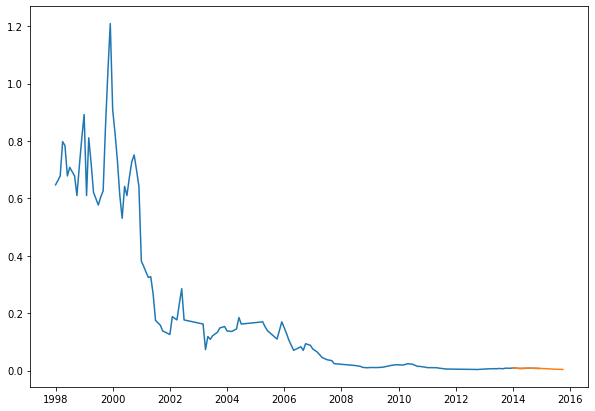

In [44]:
fig, ax2 = plt.subplots(1,figsize=(10,7))
ax2.plot(Ytrn)
ax2.plot(Ytest);

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtest = scaler.fit_transform(Xtest)
Xtrn = scaler.fit_transform(Xtrn)

##Колдуем с предсказаниями 

In [46]:
models = [LinearRegression(), 
          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
          KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
          ]

In [47]:
# Xtrn = np.array(Xtrn)
# Xtest = np.array(Xtest)
Ytrn = np.array(Ytrn)
Ytest = np.array(Ytest)
print(Ytrn.shape)
print(Ytest.shape)
print(Xtrn.shape)
print(Xtest.shape)

(204, 1)
(22, 1)
(204, 6)
(22, 6)


In [48]:
#создаем временные структуры
TestModels = DataFrame()
TestModelsPred = DataFrame()
tmp = {}

#для каждой модели из списка
for model in models:
    #получаем имя модели
    m = str(model)
    tmp['Model'] = m[:m.index('(')]    
    #для каждого столбцам результирующего набора
    for i in range(Ytrn.shape[1]):
        #обучаем модель
        model.fit(Xtrn, Ytrn) 
        #вычисляем коэффициент детерминации
        tmp['R2_Y%s'%str(i+1)] = r2_score(Ytest, model.predict(Xtest))
        pred = model.predict(Xtest)
    #записываем данные и итоговый DataFrame
    pred = model.predict(Xtest)
    TestModels = TestModels.append([tmp])
#делаем индекс по названию модели
TestModels.set_index('Model', inplace=True)

Как мы видим модели отработали плохо

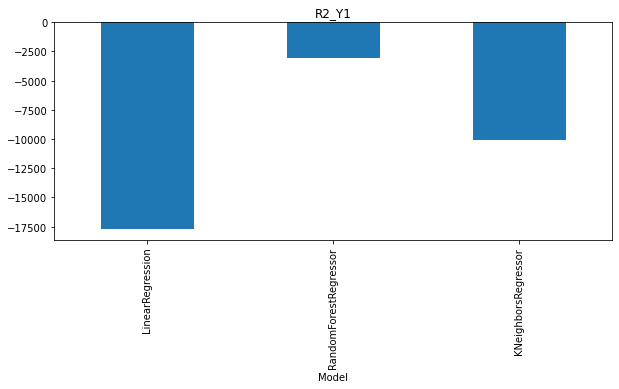

In [49]:
fig, axes = plt.subplots(1, 1, figsize=(10,4))
TestModels.R2_Y1.plot(kind='bar', title='R2_Y1');

In [50]:
model = models[1].fit(Xtrn, Ytrn).feature_importances_

print(model)

[0.29311716 0.46701325 0.15380331 0.01451119 0.06566851 0.00588657]


# Высчитывание тренда

Складываем обучающие массива

In [51]:
X_2 = np.vstack((Xtrn, Xtest))
y_2 = np.vstack((Ytrn, Ytest))
print(X_2.shape, '\n', X_2[:5], '\n\n',
      y_2.shape, '\n', y_2[:5])

(226, 6) 
 [[0.02169045 1.         1.         0.         0.         0.        ]
 [0.02725245 1.         1.         0.         0.         0.        ]
 [0.02602381 1.         1.         0.         0.         0.        ]
 [0.03434681 1.         1.         0.         0.         0.        ]
 [0.02805799 1.         1.         0.         0.         0.        ]] 

 (226, 1) 
 [[0.64710324]
 [0.66268797]
 [0.67803354]
 [0.7975072 ]
 [0.78390154]]


In [52]:
# Находим дифференциа
y_der = np.diff(y_2.ravel())

print(y_der[:10])
print('\n', y_der.shape)

[ 0.01558473  0.01534557  0.11947365 -0.01360565 -0.105868    0.03000225
 -0.01488861 -0.01511364 -0.06826797  0.10318424]

 (225,)


In [53]:
# y_reduced = y_2[:-1].ravel() - y_der.ravel()
# print(y_reduced.shape)

# fig = plt.figure(figsize = (30, 20))
# plt.plot(X_2, y_2, label = "original")
# plt.plot(X_2[:-1], y_der, label = "derivative") # Производная

# plt.legend();

## Сезонная декомпозиция

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decomposition_plot(ts):

    decomposition = seasonal_decompose(ts)  # логарифмируем исх. данные!!!

# разложение исх. данных на тренд, сезонность и остатки
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    return ts - trend

def decomposition_plot2(ts):
# используем seasonal_decompose из statsmodels.tsa.seasonal

    decomposition = seasonal_decompose(ts)  # логарифмируем исх. данные!!!

# разложение исх. данных на тренд, сезонность и остатки
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

# Plotting
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(ts, label='Исх. данные НЕ логарифмир.', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Тренд', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Сезонность', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Остатки', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    return trend

Размер массивов

In [55]:
X_train_2 = X_2
y_train_2 = y_2
print(X_train_2.shape, y_train_2.shape)

X_test_2 = X_2
y_test_2 = y_2
print(X_test_2.shape, y_test_2.shape)

(226, 6) (226, 1)
(226, 6) (226, 1)


Функция экспоненциального скользящего окна

In [56]:
def numpy_ewma_vectorized(data, window):

    alpha = 2 /(window + 1.0)
    alpha_rev = 1-alpha

    scale = 1/alpha_rev
    n = data.shape[0]

    r = np.arange(n)
    scale_arr = scale**r
    offset = data[0]*alpha_rev**(r+1)
    pw0 = alpha*alpha_rev**(n-1)

    mult = data*pw0*scale_arr
    cumsums = mult.cumsum()
    out = offset + cumsums*scale_arr[::-1]
    return out

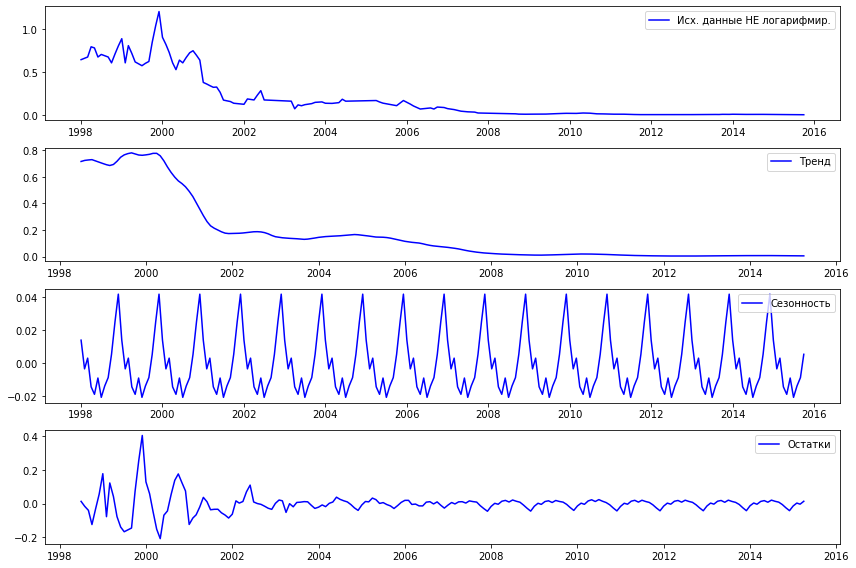

(225,)


In [57]:
ema = numpy_ewma_vectorized(df["price_ram"], 3)
trend = decomposition_plot2(df["price_ram"]).fillna(method = "bfill").fillna(method = "ffill").to_numpy()
print(y_der.shape)

In [58]:
print(trend.shape)
print(y_2.shape)


(214,)
(226, 1)


График данных с трендом и без тренда

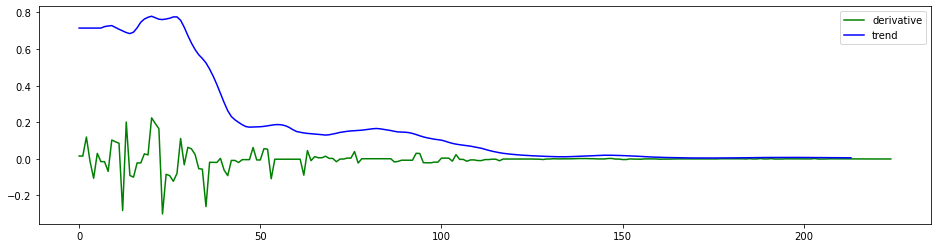

In [59]:
fig = plt.figure(figsize=(16, 4))
plt.plot(y_der.flatten(), c="g", label = "derivative")
plt.plot(trend.flatten(), c="b", label = "trend")
plt.legend()
plt.show()

In [60]:
Xtrn 
Xtest = Xtest[:-1,:]
print(Xtrn.shape)
print(Xtest.shape)

Ytrn = y_der[:204]
Ytest = y_der[204:]
print(Ytrn.shape)
print(Ytest.shape)

(204, 6)
(21, 6)
(204,)
(21,)


In [61]:
#создаем временные структуры
TestModels = DataFrame()
TestModelsPred = DataFrame()
tmp = {}

#для каждой модели из списка
for model in models:
    #получаем имя модели
    m = str(model)
    tmp['Model'] = m[:m.index('(')]    
    #для каждого столбцам результирующего набора
    for i in range(Ytrn.shape[0]):
        #обучаем модель
        model.fit(Xtrn, Ytrn) 
        #вычисляем коэффициент детерминации
        tmp['R2_Y%s'%str(i+1)] = r2_score(Ytest, model.predict(Xtest))
        pred = model.predict(Xtest)
    #записываем данные и итоговый DataFrame
    pred = model.predict(Xtest)
    TestModels = TestModels.append([tmp])
#делаем индекс по названию модели
TestModels.set_index('Model', inplace=True)

Теперь модель отработала знаительно лучше, но всё равно не удовлетворительно

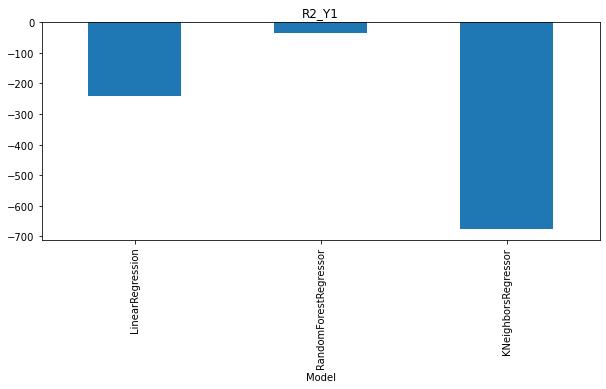

In [62]:
fig, axes = plt.subplots(1, 1, figsize=(10,4))
TestModels.R2_Y1.plot(kind='bar', title='R2_Y1');

## Инициализация моделей регрессий

In [63]:
from sklearn.svm import NuSVR
from sklearn.linear_model import LinearRegression

def few_regressors(Xtrn, Ytrn, Xtest, Ytest):
    forest_data = RandomForestRegressor().fit(Xtrn, Ytrn)
    print(forest_data.score(Xtest, Ytest))



    knn = KNeighborsRegressor().fit(Xtrn, Ytrn)
    print(knn.score(Xtest, Ytest))

    ln = LinearRegression().fit(Xtrn, Ytrn)
    print(ln.score(Xtest, Ytest))

   
    
    return forest_data, knn, ln

In [64]:
forest_data,  knn, ln = few_regressors(Xtrn, Ytrn, Xtest, Ytest)

-624.5505651354604
-403.38073371547495
-241.57719021140971


In [65]:
Xtrn_1 = pd.DataFrame(Xtrn, columns=['Price_gold', 'processnodes(nm)', 'vA','vB','vC','vD'])
Xtest_1 = pd.DataFrame(Xtest, columns=['Price_gold', 'processnodes(nm)','vA','vB','vC','vD'])
Ytrn_1 = pd.DataFrame(Ytrn, columns=['price_ram'])
Ytest_1 = pd.DataFrame(Ytest, columns=['price_ram'])


X_train_2_pd = Xtrn_1
X_test_2_pd = Xtest_1
X_train_3 = X_train_2_pd 
X_test_3 = X_test_2_pd

y_train_3 = Ytrn_1
y_test_3 = Ytest_1
print(X_train_3.head(3), "\n")
print(X_test_3.head(3), "\n")
print(y_train_3.head(3))
print(y_test_3.head(3))

   Price_gold  processnodes(nm)   vA   vB   vC   vD
0    0.021690               1.0  1.0  0.0  0.0  0.0
1    0.027252               1.0  1.0  0.0  0.0  0.0
2    0.026024               1.0  1.0  0.0  0.0  0.0 

   Price_gold  processnodes(nm)   vA   vB   vC   vD
0    0.573164               1.0  0.0  0.0  0.0  0.0
1    0.827210               0.0  0.0  0.0  0.0  0.0
2    1.000000               0.0  0.0  0.0  0.0  0.0 

   price_ram
0   0.015585
1   0.015346
2   0.119474
   price_ram
0  -0.000793
1  -0.000793
2  -0.000595


In [66]:
forest_data,  knn, lnn = few_regressors(X_train_3, y_train_3, X_test_3, y_test_3)

-498.95801802919834
-403.38073371547495
-241.57719021140971


In [67]:
y_test_exp = np.exp(y_test_3-1) 

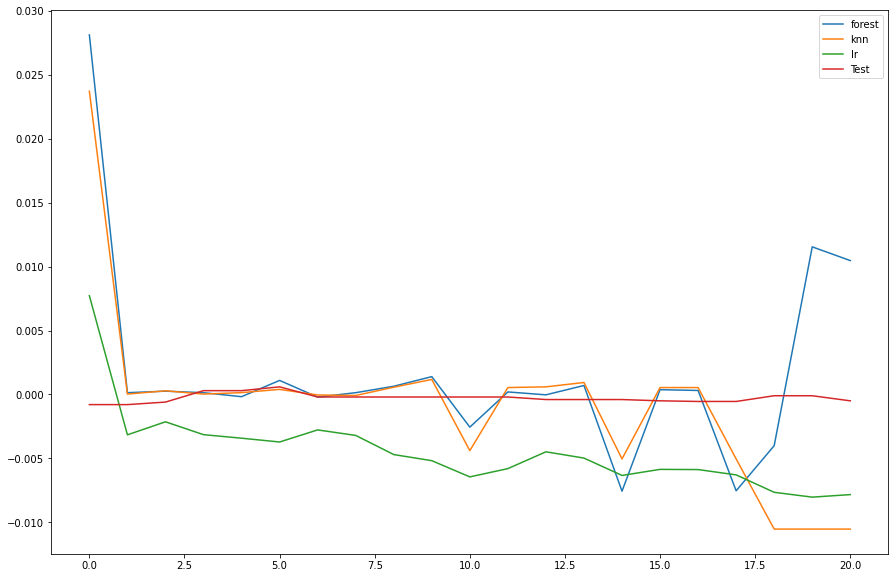

In [68]:
fig = plt.figure(figsize = (15, 10))
# plt.plot(X_train_3.index, y_train_3, label='Train')
plt.plot(X_test_3.index, forest_data.predict(X_test_3), label="forest")

plt.plot(X_test_3.index, knn.predict(X_test_3), label="knn")

plt.plot(X_test_3.index, ln.predict(X_test_3), label="lr")
plt.plot(X_test_3.index, y_test_3, label="Test")
plt.legend()
plt.show()

In [69]:
X_train_4 = X_train_3 # Производная
X_test_4 = X_test_3

y_train_4 = Ytrn_1
y_test_4 = Ytest_1

print(X_train_3.head(3))
print()
print(y_train_3.head(3))

   Price_gold  processnodes(nm)   vA   vB   vC   vD
0    0.021690               1.0  1.0  0.0  0.0  0.0
1    0.027252               1.0  1.0  0.0  0.0  0.0
2    0.026024               1.0  1.0  0.0  0.0  0.0

   price_ram
0   0.015585
1   0.015346
2   0.119474


## График квадратичной ошибки

predicted=0.094077, expected=-0.282232
predicted=0.146496, expected=0.165156
predicted=0.028565, expected=0.023867
predicted=-0.049821, expected=-0.008432
predicted=0.014721, expected=0.052877
predicted=-0.001802, expected=-0.088868
predicted=-0.003466, expected=-0.000871
predicted=0.000849, expected=0.000847
predicted=-0.007259, expected=-0.007365
predicted=-0.003219, expected=0.004150
predicted=-0.008057, expected=-0.003734
predicted=-0.000740, expected=-0.000719
predicted=-0.000099, expected=-0.000066
predicted=0.001584, expected=0.001078
predicted=-0.002781, expected=0.000000
predicted=-0.000862, expected=-0.001027
predicted=-0.000011, expected=-0.000050
predicted=0.000403, expected=0.000323
predicted=0.000330, expected=-0.000793
predicted=-0.000198, expected=-0.000198
Test MSE: 0.004


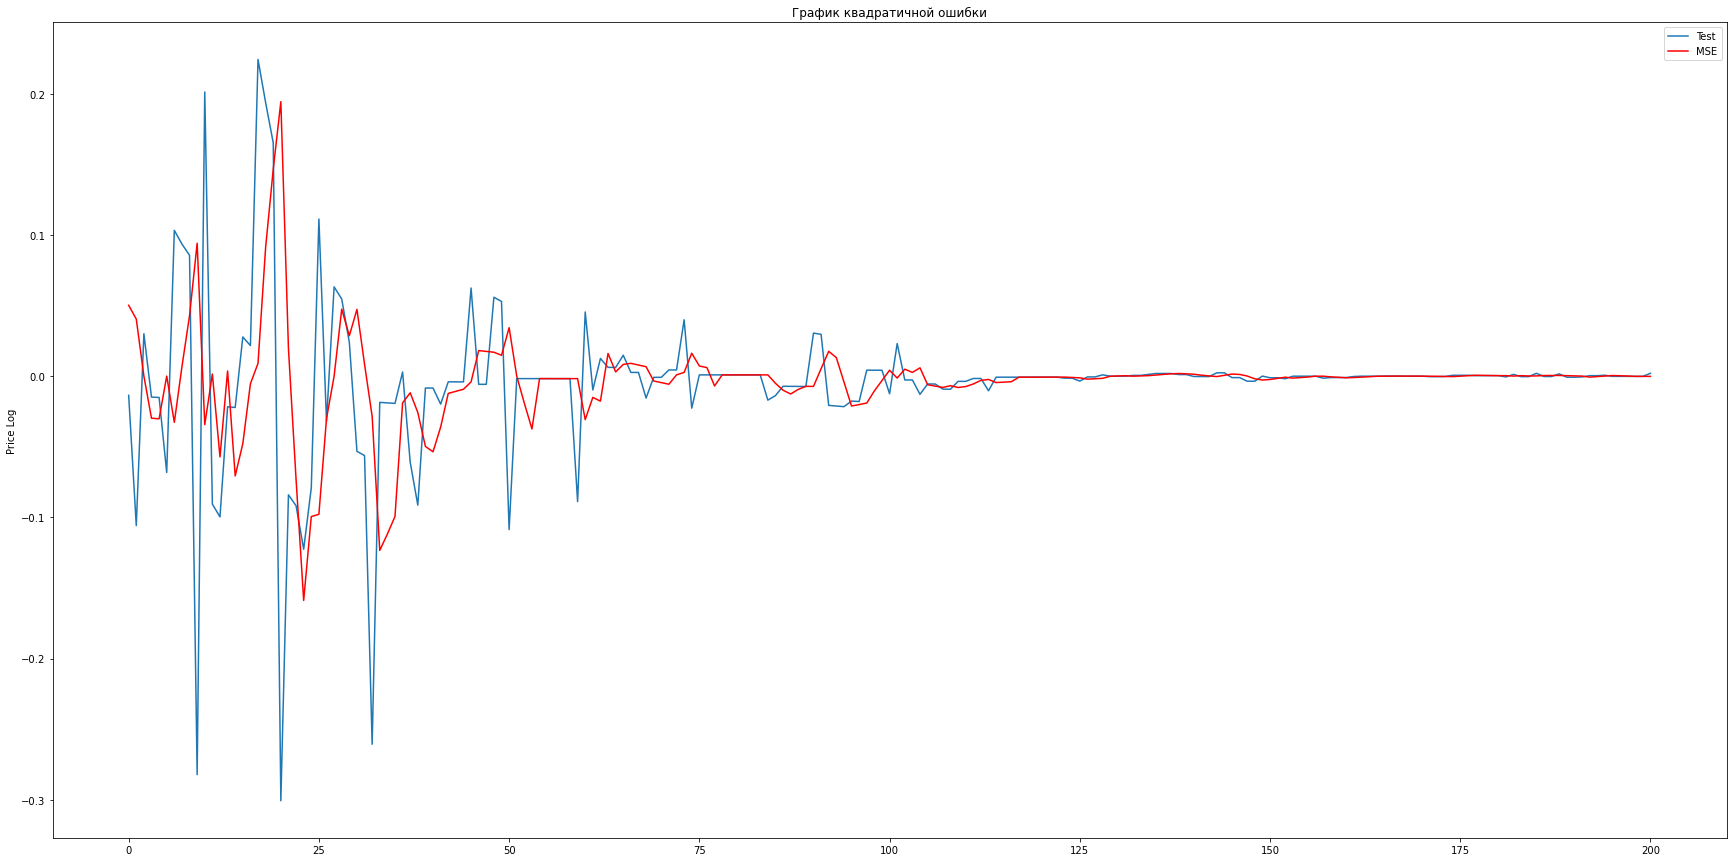

In [70]:
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

# prepare situation
X = y_train_4.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))] # Тестовые данные
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    if len(predictions) % 10 == 0:
        print('predicted=%f, expected=%f' % (yhat, obs))

# Квадратичная ошибка
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

fig = plt.figure(figsize = (30, 15))

plt.plot(test, label='Test')
plt.plot(predictions, color='red', label = 'MSE')
plt.title('График квадратичной ошибки')
plt.xlabel('')
plt.ylabel('Price Log')
plt.legend();

# Приближение на графике
# zoom plot
# plt.plot(test[40:60])
# plt.plot(predictions[40:60], color='red')
# plt.title('')
# plt.show();

# Дифф. признаков

In [71]:
X_train_3_diff, y_train_3_diff, X_test_3_diff, y_test_3_diff = X_train_3.diff(), y_train_3.diff(), X_test_3.diff(), y_test_3.diff()
X_train_3_diff, y_train_3_diff, X_test_3_diff, y_test_3_diff = X_train_3_diff.dropna(), y_train_3_diff.dropna(), X_test_3_diff.dropna(), y_test_3_diff.dropna()

-75754.89746049419
-10769.001918578651
-524454.8965789112


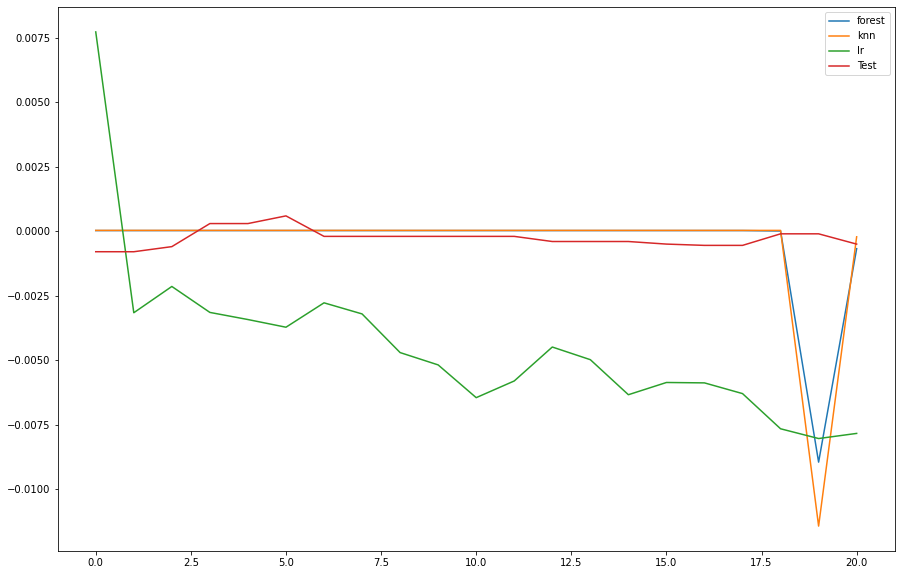

In [72]:
forest_data,  knn, lnn = few_regressors(X_train_3_diff, y_train_3_diff, X_test_3_diff, y_test_3_diff)

fig = plt.figure(figsize = (15, 10))
# plt.plot(X_train_3.index, y_train_3, label='Train')
plt.plot(X_test_3.index, forest_data.predict(X_test_3), label="forest")

plt.plot(X_test_3.index, knn.predict(X_test_3), label="knn")

plt.plot(X_test_3.index, ln.predict(X_test_3), label="lr")
plt.plot(X_test_3.index, y_test_3, label="Test")
plt.legend()
plt.show()